In [129]:
from signal import valid_signals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [130]:
df = pd.read_csv("/ExamExercises/Datasets/phones-v1.csv")

In [131]:
df.head()

,Brand,Model,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range
0,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price
1,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price
2,Samsung,Samsung Galaxy S9+,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price
3,Samsung,Samsung Galaxy S9+,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price
4,Samsung,Samsung Galaxy S9+,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price


<Axes: >

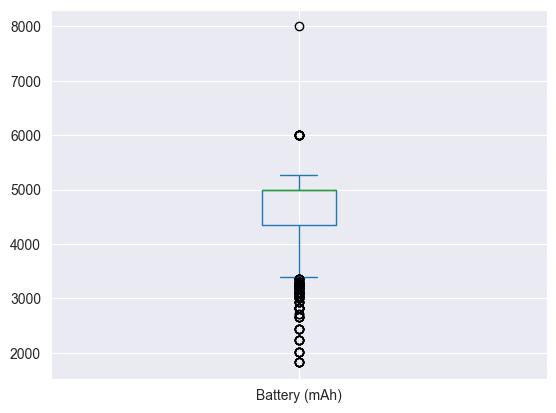

In [135]:
df["Battery (mAh)"].plot.box()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          1011 non-null   object 
 1   Model          946 non-null    object 
 2   Storage (GB)   1011 non-null   int64  
 3   RAM (GB)       1011 non-null   int64  
 4   Launch         1011 non-null   object 
 5   Dimensions     1011 non-null   object 
 6   Weight (g)     1011 non-null   float64
 7   Display Type   1011 non-null   object 
 8   Display Size   1011 non-null   float64
 9   OS             1011 non-null   object 
 10  NFC            1011 non-null   bool   
 11  Battery (mAh)  963 non-null    float64
 12  CPU            1011 non-null   object 
 13  Year           1011 non-null   int64  
 14  PPI Density    1011 non-null   int64  
 15  Price Range    996 non-null    object 
dtypes: bool(1), float64(3), int64(4), object(8)
memory usage: 119.6+ KB


<Axes: xlabel='Price Range'>

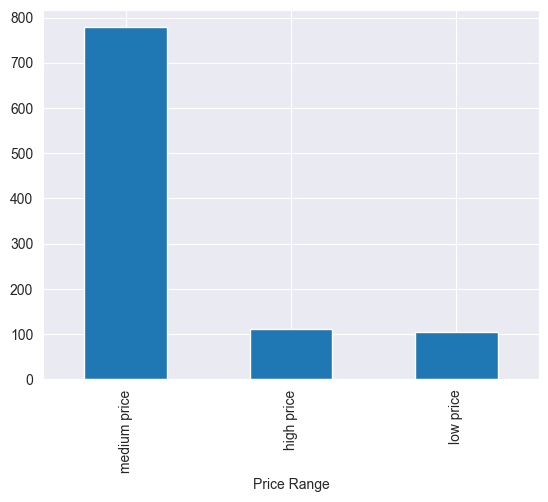

In [77]:
df["Price Range"].value_counts().plot.bar()

In [78]:
df.isnull().sum()

Brand             0
Model            65
Storage (GB)      0
RAM (GB)          0
Launch            0
Dimensions        0
Weight (g)        0
Display Type      0
Display Size      0
OS                0
NFC               0
Battery (mAh)    48
CPU               0
Year              0
PPI Density       0
Price Range      15
dtype: int64

In [79]:
df["Brand"].unique()

array(['Apple', 'Samsung', 'Xiaomi'], dtype=object)

In [80]:
df = pd.concat([df, pd.get_dummies(df["Brand"])], axis=1)
df.drop("Brand", axis=1, inplace=True)
df.head()

,Model,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi
0,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False
1,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False
2,Samsung Galaxy S9+,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False
3,Samsung Galaxy S9+,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False
4,Samsung Galaxy S9+,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False


In [81]:
df["Model"].unique().shape

(216,)

In [82]:
df.drop(columns=["Model"], inplace=True)
df.head()

,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi
0,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False
1,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False
2,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False
3,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False
4,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False


In [83]:
df.drop(columns=["Launch"], inplace=True)
df.head()

,Storage (GB),RAM (GB),Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi
0,256,3,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False
1,256,3,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False
2,64,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False
3,128,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False
4,256,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False


In [84]:
def dimensions_processing(value):
    if not pd.isna(value):
        values = value.split("mm")[0].split("x")
        return [float(value) for value in values]
    return value

In [85]:
df[["Heigh", "Width", "Thickness"]] = df["Dimensions"].apply(dimensions_processing).tolist()

In [86]:
df.drop(columns=["Dimensions"], inplace=True)

In [87]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi,Heigh,Width,Thickness
0,256,3,174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False,143.6,70.9,7.7
1,256,3,174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False,143.6,70.9,7.7
2,64,6,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False,158.1,73.8,8.5
3,128,6,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False,158.1,73.8,8.5
4,256,6,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False,158.1,73.8,8.5


In [88]:
df = pd.concat([df, pd.get_dummies(df["Display Type"])], axis=1)
df.drop(columns=["Display Type"], inplace=True)

In [89]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi,Heigh,Width,Thickness,AMOLED,LCD,OLED
0,256,3,174.0,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False,143.6,70.9,7.7,False,False,True
1,256,3,174.0,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False,143.6,70.9,7.7,False,False,True
2,64,6,189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False,158.1,73.8,8.5,True,False,False
3,128,6,189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False,158.1,73.8,8.5,True,False,False
4,256,6,189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False,158.1,73.8,8.5,True,False,False


In [90]:
df = pd.concat([df, pd.get_dummies(df["OS"])], axis=1)
df.drop(columns=["OS"], inplace=True)

In [91]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,Heigh,Width,Thickness,AMOLED,LCD,OLED,Android,iOS
0,256,3,174.0,5.8,True,2716.0,Hexa-Core,2017,458,high price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
1,256,3,174.0,5.8,True,2716.0,Hexa-Core,2017,458,low price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
2,64,6,189.0,6.2,True,3500.0,Octa-Core,2018,529,low price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
3,128,6,189.0,6.2,True,3500.0,Octa-Core,2018,529,medium price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
4,256,6,189.0,6.2,True,3500.0,Octa-Core,2018,529,high price,...,True,False,158.1,73.8,8.5,True,False,False,True,False


In [92]:
df["NFC"] = df["NFC"].astype(int)

In [93]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,Heigh,Width,Thickness,AMOLED,LCD,OLED,Android,iOS
0,256,3,174.0,5.8,1,2716.0,Hexa-Core,2017,458,high price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
1,256,3,174.0,5.8,1,2716.0,Hexa-Core,2017,458,low price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
2,64,6,189.0,6.2,1,3500.0,Octa-Core,2018,529,low price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
3,128,6,189.0,6.2,1,3500.0,Octa-Core,2018,529,medium price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
4,256,6,189.0,6.2,1,3500.0,Octa-Core,2018,529,high price,...,True,False,158.1,73.8,8.5,True,False,False,True,False


In [94]:
df["CPU"].unique()

array(['Hexa-Core', 'Octa-Core', 'Quad-Core'], dtype=object)

In [95]:
df["CPU"] = df["CPU"].map({"Hexa-Core": 6, "Octa-Core": 8, "Quad-Core": 4})
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,Heigh,Width,Thickness,AMOLED,LCD,OLED,Android,iOS
0,256,3,174.0,5.8,1,2716.0,6,2017,458,high price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
1,256,3,174.0,5.8,1,2716.0,6,2017,458,low price,...,False,False,143.6,70.9,7.7,False,False,True,False,True
2,64,6,189.0,6.2,1,3500.0,8,2018,529,low price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
3,128,6,189.0,6.2,1,3500.0,8,2018,529,medium price,...,True,False,158.1,73.8,8.5,True,False,False,True,False
4,256,6,189.0,6.2,1,3500.0,8,2018,529,high price,...,True,False,158.1,73.8,8.5,True,False,False,True,False


In [96]:
ordinal_encoder = OrdinalEncoder(
    categories=[["low price", "medium price", "high price"]],
    handle_unknown="use_encoded_value",
    unknown_value=np.nan,
)

In [97]:
df[["Price Range"]] = ordinal_encoder.fit_transform(df[["Price Range"]])

In [98]:
df.isnull().sum()

Storage (GB)      0
RAM (GB)          0
Weight (g)        0
Display Size      0
NFC               0
Battery (mAh)    48
CPU               0
Year              0
PPI Density       0
Price Range      15
Apple             0
Samsung           0
Xiaomi            0
Heigh             0
Width             0
Thickness         0
AMOLED            0
LCD               0
OLED              0
Android           0
iOS               0
dtype: int64

<Axes: >

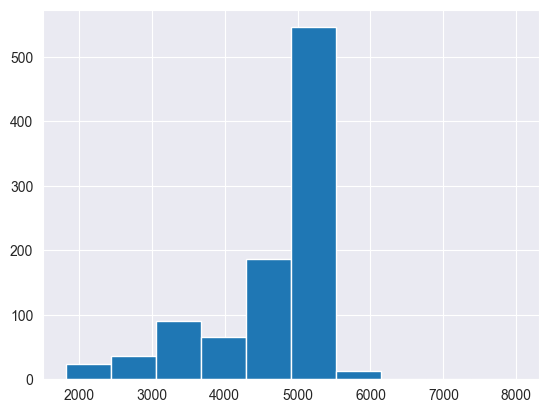

In [99]:
df["Battery (mAh)"].hist()

<Axes: >

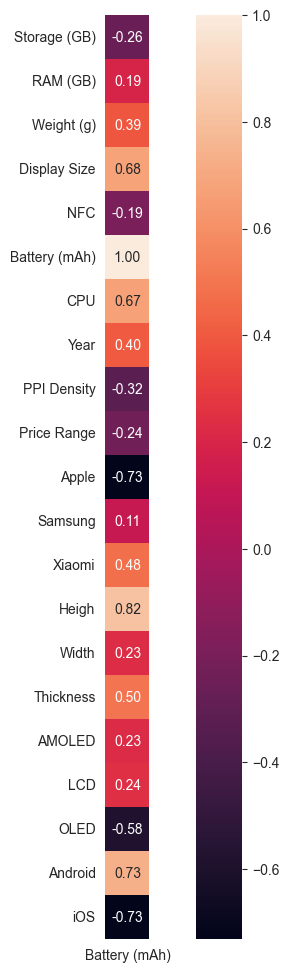

In [100]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True)[["Battery (mAh)"]], annot=True, fmt=".2f", square=True)

In [104]:
cols = ["Battery (mAh)", "Display Size", "CPU", "Apple", "Heigh", "Thickness", "OLED", "Android", "iOS"]

In [105]:
iterative_imputer = IterativeImputer()

In [106]:
df[cols] = iterative_imputer.fit_transform(df[cols])

In [107]:
df.isnull().sum()

Storage (GB)      0
RAM (GB)          0
Weight (g)        0
Display Size      0
NFC               0
Battery (mAh)     0
CPU               0
Year              0
PPI Density       0
Price Range      15
Apple             0
Samsung           0
Xiaomi            0
Heigh             0
Width             0
Thickness         0
AMOLED            0
LCD               0
OLED              0
Android           0
iOS               0
dtype: int64

In [108]:
df.dropna(subset=["Price Range"],axis=0, inplace=True)

In [109]:
df.isnull().sum()

Storage (GB)     0
RAM (GB)         0
Weight (g)       0
Display Size     0
NFC              0
Battery (mAh)    0
CPU              0
Year             0
PPI Density      0
Price Range      0
Apple            0
Samsung          0
Xiaomi           0
Heigh            0
Width            0
Thickness        0
AMOLED           0
LCD              0
OLED             0
Android          0
iOS              0
dtype: int64

In [110]:
X, y = df.drop(columns="Price Range"), df["Price Range"]

In [111]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [113]:
classifier = LogisticRegression().fit(train_X, train_y)

In [114]:
pred_y = classifier.predict(test_X)

In [115]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.62      0.26      0.37        19
         1.0       0.84      0.96      0.90       160
         2.0       0.67      0.29      0.40        21

    accuracy                           0.82       200
   macro avg       0.71      0.50      0.56       200
weighted avg       0.80      0.82      0.80       200



In [116]:
classifier = KNeighborsClassifier().fit(train_X, train_y)

In [117]:
pred_y = classifier.predict(test_X)

In [118]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.71      0.26      0.38        19
         1.0       0.86      0.97      0.91       160
         2.0       0.83      0.48      0.61        21

    accuracy                           0.85       200
   macro avg       0.80      0.57      0.64       200
weighted avg       0.84      0.85      0.83       200



In [119]:
classifier = DecisionTreeClassifier().fit(train_X, train_y)

In [120]:
pred_y = classifier.predict(test_X)

In [121]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.44      0.37      0.40        19
         1.0       0.85      0.91      0.88       160
         2.0       0.62      0.38      0.47        21

    accuracy                           0.81       200
   macro avg       0.64      0.55      0.58       200
weighted avg       0.79      0.81      0.79       200



In [122]:
param_grid = {
    "criterion": ["entropy", "gini"],
    "max_depth": [None, 1, 2, 3, 4],
}

In [123]:
classifier = DecisionTreeClassifier()

In [124]:
grid_search = GridSearchCV(
    classifier,
    param_grid,
    scoring="f1_weighted",
    cv=5,
)

In [125]:
grid_search.fit(train_X, train_y)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['entropy', 'gini'], 'max_depth': [None, 1, ...]}"
,scoring,'f1_weighted'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [126]:
pred_y = grid_search.predict(test_X)

In [127]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.50      0.26      0.34        19
         1.0       0.87      0.95      0.91       160
         2.0       0.80      0.57      0.67        21

    accuracy                           0.84       200
   macro avg       0.72      0.59      0.64       200
weighted avg       0.83      0.84      0.83       200

